**作业内容：使用sklearn的KNeighborsClassifier api实现KNN算法，解决手写字体识别的分类问题**

In [23]:
from numpy import *
from os import listdir
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split

In [24]:
def load_data(name):
    # 加载训练集
    hwLabels = []
    trainingFileList = listdir(name)
    m = len(trainingFileList)
    trainingMat = zeros((m, 1024))
    # hwLabels存储0～9对应的index位置， trainingMat存放的每个位置对应的图片向量
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]  # take off .txt
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        # 将 32*32的矩阵->1*1024的矩阵
        trainingMat[i, :] = img2vector('%s/%s' % (name,fileNameStr))
    return  trainingMat,hwLabels

def img2vector(filename):
    """
    将图像数据转换为向量
    :param filename: 图片文件 因为我们的输入数据的图片格式是 32 * 32的
    :return: 一维矩阵
    该函数将图像转换为向量：该函数创建 1 * 1024 的NumPy数组，然后打开给定的文件，
    循环读出文件的前32行，并将每行的头32个字符值存储在NumPy数组中，最后返回数组。
    """
    returnVect = zeros((1, 1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0, 32 * i + j] = int(lineStr[j])
    return returnVect
    

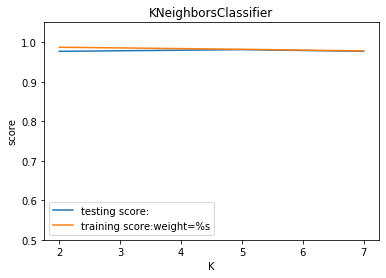

In [25]:
#加载数据集
x_train,y_train=load_data('trainingDigits')
x_test,y_test=load_data('testDigits')


# 选定不同的K值做比对
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
training_scores=[]
testing_scores=[]
Ks=[2,5,7]
for k in Ks:
    # 调用KNN分类器
    knn=neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    training_scores.append(knn.score(x_train,y_train))
    testing_scores.append(knn.score(x_test,y_test))
    
ax.plot(Ks,testing_scores,label="testing score:")
ax.plot(Ks,training_scores,label="training score:weight=%s")
ax.legend(loc='best')
ax.set_xlabel("K")
ax.set_ylabel("score")
ax.set_ylim(0.5,1.05)
ax.set_title("KNeighborsClassifier")
plt.show()